#**GRIP MAY 21**
#**Task 1**
#**Prediction using Supervised ML**
#**Author: BRATATI SAHA CHOWDHURY**
#**Objective: Predict the percentage of an student based on the number         of study hours**
**Supervised ML:** supervised machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately.

In [ ]:
# at first we import the required libraries
import pandas as pd
import numpy as np  
import statsmodels.api as sm
import matplotlib.pyplot as plt  
import seaborn as sb
%matplotlib inline

In [ ]:
# importing the data we want to analyse
url = "http://bit.ly/w-data"
study = pd.read_csv(url)
print(study.shape)
print(study.head())
print(study.tail())

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
# checking for null values in the data
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
study.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#**Visualisation of the data using Scatterplot**

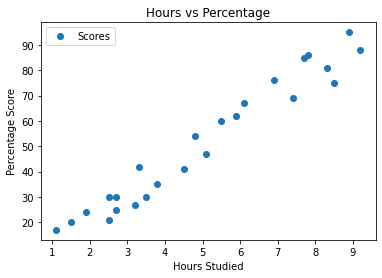

In [ ]:
# 
study.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above scatterplot we can easily see that there is a highly positive linear correlation between 'Percentage Score' and 'Hours Studied'.**

#**Splitting the data**
 Dividing the data into "attributes" (inputs) and "labels" (outputs).
 Here attribute is number of hours studied and label is scores. 

In [ ]:
x = study.iloc[:, :1].values  
y = study.iloc[:, 1:].values  
print("x values:\n", x)
print("y values:\n", y)

x values:
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y values:
 [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


#**Splitting the data into train and test sets**
We have to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

#**Training the Algorithm**
We have splited the dataset. Now we train the algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Intercept: ", regressor.intercept_)
print("Coefficients: ", regressor.coef_)

Intercept:  [2.01816004]
Coefficients:  [[9.91065648]]


#**Plotting the regression line**

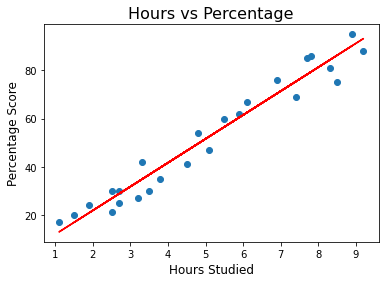

In [ ]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color='red')
plt.title('Hours vs Percentage', fontsize =16)  
plt.xlabel('Hours Studied', fontsize =12)  
plt.ylabel('Percentage Score', fontsize =12)  
plt.show()

#**Making Predictions**

#**Predicting the score for students who studied 9.25 hours per day**

In [ ]:
new_hours = np.array([[9.25]])
own_pred = regressor.predict(new_hours)
print("Predicted Score of the student who studied 9.25 hours per day = {}".format(own_pred))

Predicted Score of the student who studied 9.25 hours per day = [[93.69173249]]


In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In the above table we can see that there is some significant difference between actual score and predicted score. So, we need to check the accuracy of the model. Since this is a linear regression based problem, we are using r-squared value and mean absolute error.

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 04 May 2021   Prob (F-statistic):           9.13e-17
Time:                        16:22:45   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

Here R-squared value is very high. So we can say that the regression model is quite good for the data set.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
